In [143]:
######################
####LIBRARY IMPORT####
######################

import config
from bs4 import BeautifulSoup as bs
import requests
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")


In [144]:
######################
########CONFIG########
######################

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [145]:
##################################
###### RESULTS USING QUERY #######
##################################

results = sp.search(q="rock", market="US")
results["tracks"]["items"][0]["album"]["name"]
results["tracks"]["items"][2]["uri"]
results["tracks"]["items"][2]["id"]

'5a6WvCvpzP3flz3ZG0aAMp'

In [146]:
##################################
######## AUDIO FEATURES ##########
##################################

sp.audio_features(results["tracks"]["items"][2]["id"])

[{'danceability': 0.592,
  'energy': 0.931,
  'key': 5,
  'loudness': -7.186,
  'mode': 0,
  'speechiness': 0.0371,
  'acousticness': 0.00551,
  'instrumentalness': 0.0301,
  'liveness': 0.205,
  'valence': 0.612,
  'tempo': 130.028,
  'type': 'audio_features',
  'id': '5a6WvCvpzP3flz3ZG0aAMp',
  'uri': 'spotify:track:5a6WvCvpzP3flz3ZG0aAMp',
  'track_href': 'https://api.spotify.com/v1/tracks/5a6WvCvpzP3flz3ZG0aAMp',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5a6WvCvpzP3flz3ZG0aAMp',
  'duration_ms': 250933,
  'time_signature': 4}]

In [147]:
#########################################################
######## RETREIVE DATA FROM MULTIPLE PLAYLISTS ##########
#########################################################

def get_playlist_tracks(username, playlist_ids):
    track_list=[]
    for i in range(len(playlist_ids)):
        results = sp.user_playlist_tracks(username,playlist_ids[i])
        tracks = results['items']
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
    #return tracks
        for i in range(len(tracks)):
            track_list.append(tracks[i])
    return track_list

In [ ]:
playlist_ids = ["37i9dQZF1DWXRqgorJj26U", "37i9dQZF1DXbSbnqxMTGx9", "4riovLwMCrY3q0Cd4e0Sqp", "0h9Gaqt2sNJ8M5aMV3h9BO", "37i9dQZF1DXbITWG1ZJKYt", "6mtYuOxzl58vSGnEDtZ9uB"]
tracking = get_playlist_tracks("spotify", playlist_ids)
len(tracking)

In [ ]:

#########################################################
########### RETREIVE DATA ON AUDIO FEATURES #############
#########################################################

list_of_audio_features=[]
for item in range(0,len(tracking)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracking[item]["track"]["id"])[0])

In [ ]:
df4=pd.DataFrame(list_of_audio_features)[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo", "duration_ms", "id"]]
df4.set_index('id', inplace=True)

<AxesSubplot:xlabel='None'>

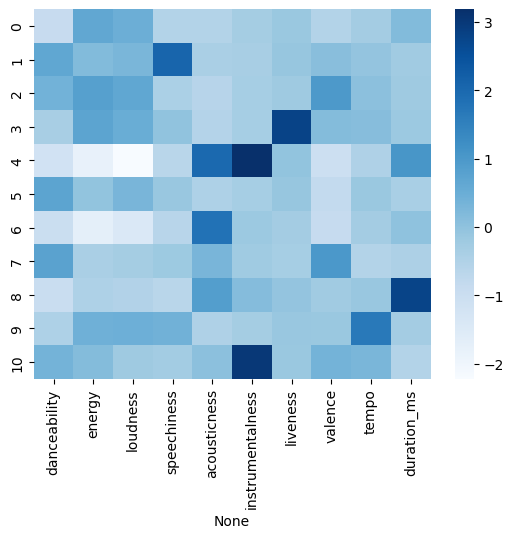

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(kmeans.cluster_centers_,columns=[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo", "duration_ms"]]),cmap="Blues")
    

In [ ]:
df4.to_csv("Spotify_Sample_Database_df4")

In [ ]:

####################################
########### SCALE DATA #############
####################################

scaler = StandardScaler()
scaler.fit(df4)
X_scaled = scaler.transform(df4)
X_scaled_df = pd.DataFrame(X_scaled, columns = df4.columns)
display(df4.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
1xsYj84j7hUDDnTTerGWlH,0.392,0.476,-7.583,0.0249,0.39700,0.000163,0.3090,0.234,78.031,267597
4KfSdst7rW39C0sfhArdrz,0.548,0.691,-13.553,0.0369,0.01500,0.106000,0.1440,0.667,137.145,261933
5UWwZ5lm5PKu6eKsHAGxOk,0.413,0.881,-5.541,0.0367,0.00006,0.000308,0.0805,0.364,158.066,250547
37ZJ0p5Jm13JPevGcx4SkF,0.532,0.887,-3.757,0.0335,0.07780,0.000214,0.2940,0.795,122.511,249293
70YvYr2hGlS01bKRIho1HM,0.545,0.640,-9.937,0.2240,0.00249,0.030400,0.1960,0.606,80.544,230480


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.667528,-0.474695,0.188159,-0.823040,0.366969,-0.367067,0.951337,-1.266443,-1.408689,0.429158
1,-0.695443,0.477775,-1.213570,-0.707469,-0.855623,0.119583,-0.245064,0.485769,0.599778,0.359580
2,-1.536670,1.319492,0.667611,-0.709396,-0.903439,-0.366401,-0.705498,-0.740375,1.310593,0.219711
3,-0.795144,1.346073,1.086487,-0.740215,-0.654632,-0.366833,0.842574,1.003744,0.102571,0.204306
4,-0.714137,0.251840,-0.364549,1.094474,-0.895661,-0.228034,0.131984,0.238921,-1.323307,-0.026798


In [ ]:
with open("/Users/jon/Documents/IRONHACK/song_recommendation/Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

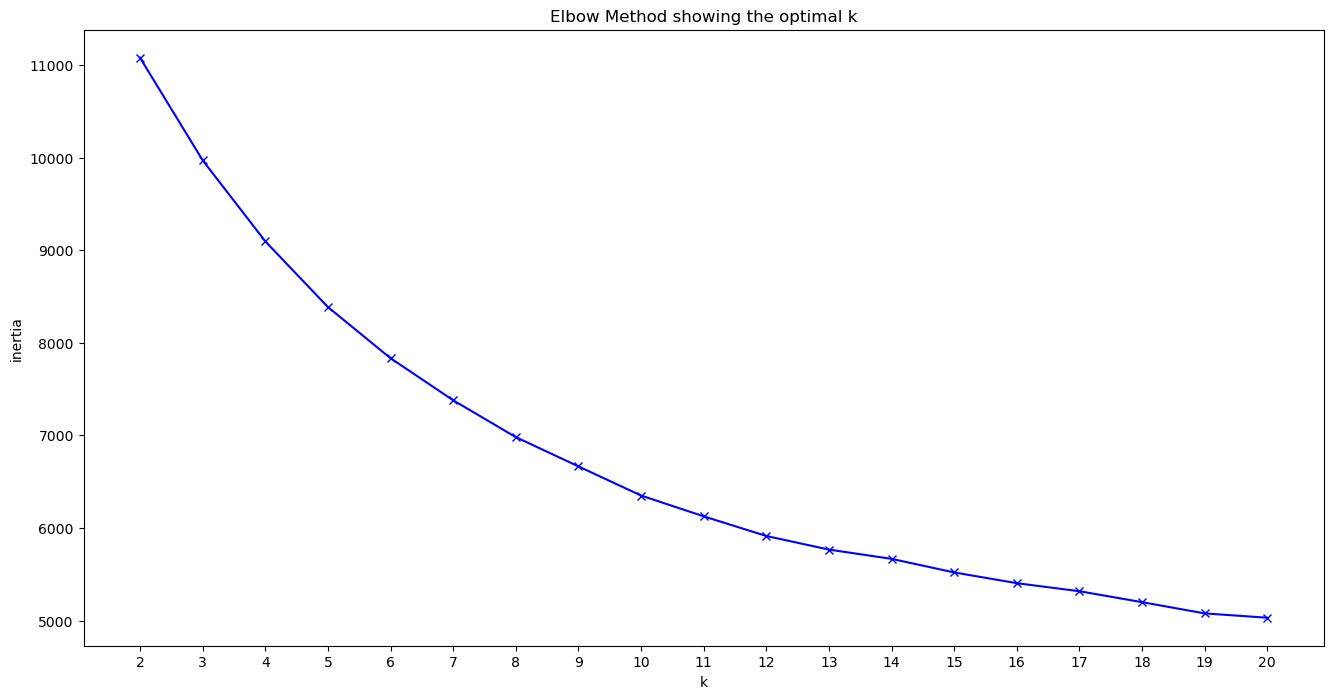

In [ ]:
#############################################
########### CHOOSING K CLUSTERS #############
#############################################

K = range(2, 21)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

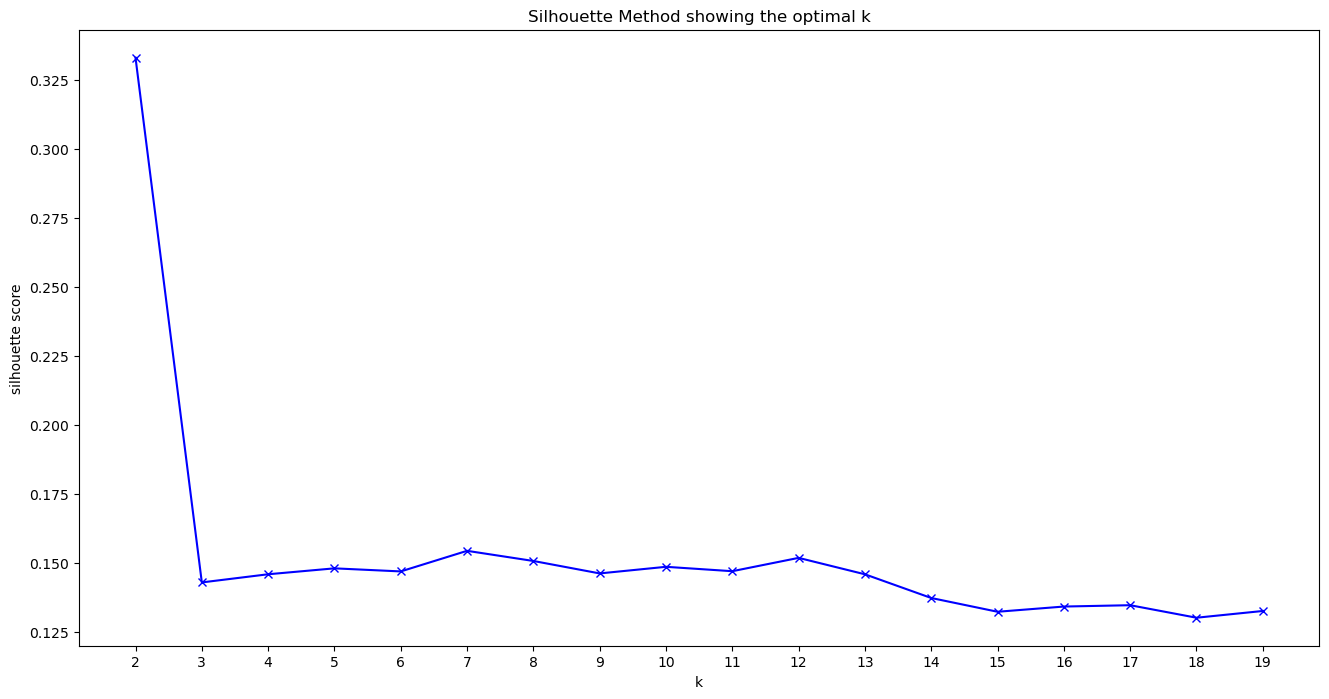

In [ ]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df) 
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(X_scaled_df)
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

In [ ]:
with open("/Users/jon/Documents/IRONHACK/song_recommendation/Model/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
kmeans.cluster_centers_

array([[-8.74749060e-01,  6.51489716e-01,  4.74451147e-01,
        -5.40963064e-01, -5.35537444e-01, -3.07624498e-01,
        -1.46891346e-01, -5.29638876e-01, -2.90819845e-01,
         1.81137791e-01],
       [ 6.69569911e-01,  1.83211652e-01,  2.84105997e-01,
         2.07831259e+00, -3.80835272e-01, -3.48082854e-01,
        -9.75847085e-02,  8.92799231e-02, -4.55383249e-02,
        -2.52329893e-01],
       [ 3.90077654e-01,  8.25338991e-01,  6.71353234e-01,
        -4.21693719e-01, -5.97715729e-01, -3.32691392e-01,
        -1.94409647e-01,  9.90260502e-01,  4.90079644e-02,
        -1.95449862e-01],
       [-3.40102641e-01,  7.23257196e-01,  5.21686121e-01,
        -2.22198622e-03, -5.56770458e-01, -3.20289618e-01,
         2.80349402e+00,  1.50567302e-01,  1.10017020e-01,
        -1.58998340e-01],
       [-1.16255171e+00, -1.81258249e+00, -2.21802459e+00,
        -6.35743877e-01,  2.00246572e+00,  3.18864759e+00,
        -4.18711964e-02, -1.01677323e+00, -4.76784999e-01,
         1.

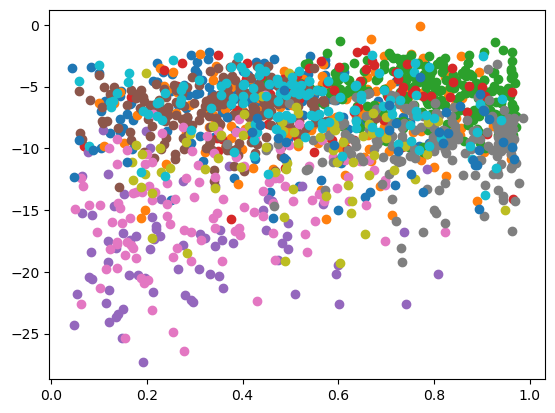

In [ ]:
#########################################
########### ASSIGN CLUSTERS #############
#########################################

# # assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df4.to_numpy()[row_ix, 7], df4.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [ ]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()


0     160
1     175
2     235
3      80
4      78
5     192
6     119
7     182
8      71
9     135
10     40
dtype: int64

In [ ]:
df4["cluster"] = clusters
df4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
id,,,,,,,,,,,
1xsYj84j7hUDDnTTerGWlH,0.392,0.476,-7.583,0.0249,0.397000,0.000163,0.3090,0.234,78.031,267597,0
4KfSdst7rW39C0sfhArdrz,0.548,0.691,-13.553,0.0369,0.015000,0.106000,0.1440,0.667,137.145,261933,0
5UWwZ5lm5PKu6eKsHAGxOk,0.413,0.881,-5.541,0.0367,0.000060,0.000308,0.0805,0.364,158.066,250547,0
37ZJ0p5Jm13JPevGcx4SkF,0.532,0.887,-3.757,0.0335,0.077800,0.000214,0.2940,0.795,122.511,249293,2
70YvYr2hGlS01bKRIho1HM,0.545,0.640,-9.937,0.2240,0.002490,0.030400,0.1960,0.606,80.544,230480,1
...,...,...,...,...,...,...,...,...,...,...,...
3KoTtGEDiBwUWzdRQVh9lh,0.651,0.812,-3.797,0.0409,0.001250,0.000030,0.6670,0.720,126.023,230733,3
5OMwQFBcte0aWFJFqrr5oj,0.755,0.832,-2.741,0.1160,0.074600,0.000001,0.2910,0.735,120.032,199693,2
0x4KuMldlnPMniT86Cmyep,0.772,0.648,-6.222,0.0612,0.161000,0.000000,0.2690,0.741,129.966,225560,2


In [ ]:
#########################################
########### SEARCH FOR TRACK ############
#########################################

#track_name = input("Enter your favourite song: ")
#track_name_results = sp.search(q=track_name, limit=1, market="US")
#track_id = track_name_results["tracks"]["items"][0]["id"]

In [ ]:
track_name = input("Enter your favourite song: ")
track_name_results = sp.search(q=track_name, market="US")
i = 0
for i in range(0,10):
    track_id = track_name_results["tracks"]["items"][i]["id"]
    response = input("Did you mean %s by %s?" %(track_name_results["tracks"]["items"][i]["name"], track_name_results["tracks"]["items"][i]['artists'][i]['name']) )
    if response == 'yes':
        print("Here is your song:")
        break
    else:
        i = i+1

IFrame(src="https://open.spotify.com/embed/track/"+track_id+"?utm_source=generator",
                     width="320",
                     height="80",
                     frameborder="0",
                     allowtransparency="true",
                     allow="encrypted-media",
              )


Here is your song:


In [ ]:
########################################################
########### SEARCH FOR TRACK AUDIO FEATURES ############
########################################################

#Find audio features for sleected track
track_features = sp.audio_features(track_id)
auido_features_list = ["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo", "duration_ms", "id"]
df_track_name = pd.DataFrame(track_features)[auido_features_list]
#set id to index
df_track_name.set_index('id', inplace=True)

In [ ]:
#############################################
########### ASSIGN TRACK CLUSTER ############
#############################################
 
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

scaler2 = load("/Users/jon/Documents/IRONHACK/song_recommendation/Model/scaler.pickle")
kmeans2 = load("/Users/jon/Documents/IRONHACK/song_recommendation/Model/kmeans.pickle")

track_cluster = int(kmeans2.predict(scaler2.transform(df_track_name)))
track_cluster

/Users/jon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


1

In [ ]:
########################################
########### SUGGESTED TRACK ############
########################################

# Return random row from rows with same cluster number
df5 = df4.loc[df4['cluster'] == track_cluster].sample()
#Turn index to column
df5['id'] = df5.index.get_level_values('id')
#return id
suggested_song = df5.iloc[0]['id']



In [ ]:
IFrame(src="https://open.spotify.com/embed/track/"+suggested_song+"?utm_source=generator",
                     width="320",
                     height="80",
                     frameborder="0",
                     allowtransparency="true",
                     allow="encrypted-media",
              )


FUNCTIONS

In [ ]:
def recommend_song(track_id, scaler, kmeans, df, auido_features_list,):
    track_features = sp.audio_features(track_id)
    df_track_name = pd.DataFrame(track_features)[auido_features_list]
    df_track_name.set_index('id', inplace=True)
    track_cluster = int(kmeans.predict(scaler.transform(df_track_name)))
    dfnew = df.loc[df['cluster'] == track_cluster].sample()
    dfnew['id'] = dfnew.index.get_level_values('id')
    suggested_song = dfnew.iloc[0]['id']
    return suggested_song

In [ ]:
from IPython.display import IFrame
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id+"?utm_source=generator",
        width="320",
        height="80",
        frameborder="0",
        allowtransparency="true",
        allow="encrypted-media",
        )

FINAL PROGRAMME

In [184]:
track_name = input("Enter your favourite song: ")
track_name_results = sp.search(q=track_name, market="US")
i = 0
while i < 10:
    track_id = track_name_results["tracks"]["items"][i]["id"]
    track_name = track_name_results["tracks"]["items"][i]["name"]
    artist_name = track_name_results["tracks"]["items"][i]['artists'][0]['name']
    response = input("Did you mean %s by %s?" %(track_name, artist_name) )
    if response == 'yes':
        print("Your chosen song is:", track_name, "by", artist_name)
        display(play_song(track_id))
        print("Your recommended song is:")
        display(play_song(recommend_song(track_id, scaler2, kmeans2, df4, auido_features_list,)))
        break
    else:
        i += 1
        if i == 10:
            print("Sorry, we couldn't find a matching song.")
        else:
            continue

Happy = input("Did you like our recommendation?")
if Happy == 'yes':
    print("Great! Happy listening.")
else:
    print("We're sorry to hear that. Here is another suggestion:")
    display(play_song(recommend_song(track_id, scaler2, kmeans2, df4, auido_features_list,)))



Your chosen song is: Stitches by Shawn Mendes


Your recommended song is:


We're sorry to hear that. Here is another suggestion:
